FIFO Page Faults: 10
LRU Page Faults: 10


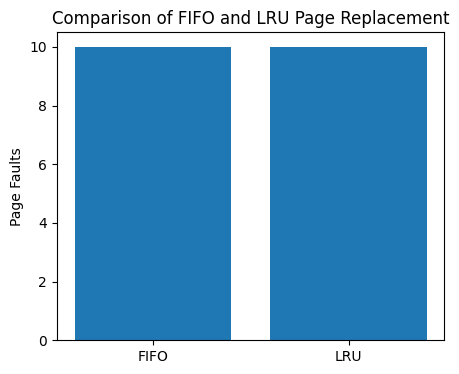

In [7]:
import matplotlib.pyplot as plt
from collections import deque

# Function to simulate FIFO page replacement
def fifo_page_replacement(reference_string, num_frames):
    memory = []
    page_faults = 0
    for page in reference_string:
        if page not in memory:
            page_faults += 1
            if len(memory) == num_frames:
                memory.pop(0)  # Remove the oldest page
            memory.append(page)
    return page_faults, memory

# Function to simulate LRU page replacement
def lru_page_replacement(reference_string, num_frames):
    memory = []
    usage_time = {}  # Dictionary to track last usage time of pages
    page_faults = 0
    for i, page in enumerate(reference_string):
        if page not in memory:
            page_faults += 1
            if len(memory) == num_frames:
                # Find the least recently used page
                lru_page = min(usage_time, key=usage_time.get)
                memory.remove(lru_page)
                del usage_time[lru_page]
            memory.append(page)
            usage_time[page] = i  # Update the last usage time for LRU
    return page_faults, memory

# Function to run the simulation and display results in Colab
def run_simulation():
    # Get inputs (manually input here for testing)
    reference_string = list(map(int, "7,0,1,2,0,3,0,4,2,3,0,3,3".split(',')))
    num_frames = 3

    # Run simulations for FIFO and LRU
    fifo_faults, _ = fifo_page_replacement(reference_string, num_frames)
    lru_faults, _ = lru_page_replacement(reference_string, num_frames)

    # Display results in Colab
    print(f"FIFO Page Faults: {fifo_faults}")
    print(f"LRU Page Faults: {lru_faults}")

    # Plot results using matplotlib
    fig, ax = plt.subplots(figsize=(5, 4))
    ax.bar(['FIFO', 'LRU'], [fifo_faults, lru_faults])
    ax.set_ylabel('Page Faults')
    ax.set_title('Comparison of FIFO and LRU Page Replacement')

    # Show plot inline in Colab
    plt.show()

# Run the simulation
run_simulation()

